# Machine learning

## Recognizing letters

Importing the necessary libraries:

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import cluster
from PIL import Image

Loading and testing an image via Pillow Library

In [3]:
#A variable is assigned to open and hold the test image
imageTest = Image.open("imageTest.jpg");

#some details checking about the image
print(imageTest.format);
print(imageTest.size);
print(imageTest.mode);

JPEG
(1360, 768)
RGB


Converting the image loaded into an Array from NumPy library

In [4]:
#using np.array() to convert an image in numpy array
imageArray = np.array(imageTest);

#printing the typr of it
print(type(imageArray));

#printing the shape of the image
print(imageArray.shape);

#priting the data of the imageArray representing each pixel of it
print(imageArray);

#Creating an image from the imageArray
imageCreated = Image.fromarray(imageArray);
print(type(imageCreated));

#Check the image details
print(imageCreated.mode);
print(imageCreated.size);

#converting the image to greyscale
imageGreyscale = imageTest.convert("L");

#saving the image
imageGreyscale.save("greyscale.jpeg");

#Priting the data of the imageGreyscale
print(np.array(imageGreyscale));

<class 'numpy.ndarray'>
(768, 1360, 3)
[[[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 76   3  72]
  [ 75   2  71]
  [ 75   2  71]]

 [[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 74   1  70]
  [ 74   1  70]
  [ 73   0  69]]

 [[ 75   2  73]
  [ 75   2  73]
  [ 75   2  73]
  ...
  [ 75   2  71]
  [ 75   2  71]
  [ 75   2  71]]

 ...

 [[  1  75 234]
  [  1  75 234]
  [  0  75 229]
  ...
  [ 62  48 145]
  [ 62  48 143]
  [ 61  47 144]]

 [[ 36  49 179]
  [ 36  49 177]
  [ 36  50 173]
  ...
  [ 68  62 152]
  [ 68  61 154]
  [ 67  61 151]]

 [[ 55  65 215]
  [ 54  66 214]
  [ 54  66 214]
  ...
  [ 30 140 255]
  [ 30 142 254]
  [ 29 139 252]]]
<class 'PIL.Image.Image'>
RGB
(1360, 768)
[[ 32  32  32 ...  33  32  32]
 [ 32  32  32 ...  31  31  30]
 [ 32  32  32 ...  32  32  32]
 ...
 [ 71  71  70 ...  63  63  62]
 [ 60  60  60 ...  74  74  73]
 [ 79  79  79 ... 120 121 119]]


Creating a function to load image and convert to greyscale

In [5]:
def imageLoadGrey(image):
    "Converts an image to greyscale and return an array about it"
    return np.array(image.convert("L"));

#testing the function
print(imageLoadGrey(imageTest));

[[ 32  32  32 ...  33  32  32]
 [ 32  32  32 ...  31  31  30]
 [ 32  32  32 ...  32  32  32]
 ...
 [ 71  71  70 ...  63  63  62]
 [ 60  60  60 ...  74  74  73]
 [ 79  79  79 ... 120 121 119]]


### 1 - Collecting the data

The Dataset utilized is Balanced dataset within the Extended MNIST

1. The EMNIST Balanced dataset is meant to address the balance issues in the ByClass and ByMerge datasets. It is derived from the ByMerge dataset to reduce     mis-classification errors due to capital and lower case letters and also has an equal number of samples per class. This dataset is meant to be the most applicable.
    train: 112,800
    test: 18,800
    total: 131,600
    classes: 47 (balanced)

2. CSV  (combined labels and images)
    The datasets are called "emnist-balanced-test" and "emnist-balanced-train" every element is separated by comma and there are no empty elements
    Each row is a separate image.
    The dataset has 785 colums and the First column is the class label (see mappings.txt for class label definitions).
    Each column after the class label, represents one pixel value (784 total for a 28 x 28 image).
    Each pixes has and associated value raging from 0 to 255(inclusive), indicating its greyscale.

In [28]:
#readinf the dataset test and train and showing it's first 5 rows
dataSetTest = pd.read_csv("archive\emnist-balanced-test.csv", sep=",");
dataSetTrain = pd.read_csv("archive\emnist-balanced-train.csv", sep=",");
dataSetTest.head(5);
dataSetTrain.head(5);

In [32]:
#from google.colab import drive
#drive.mount("/content/drive");

### 2 - Explore the data

Now it's time to explore the dataset:
    1. How many examples there are in the datasets?
    2. How many examples which class has?
    3. How are the letters we are trying to recognize?

In [55]:
#1. Showing all examples 
print(dataSetTrain['45'].count());
print(dataSetTrain);

112799
        45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  \
0       36  0    0    0    0    0    0    0    0    0  ...      0      0   
1       43  0    0    0    0    0    0    0    0    0  ...      0      0   
2       15  0    0    0    0    0    0    0    0    0  ...      0      0   
3        4  0    0    0    0    0    0    0    0    0  ...      0      0   
4       42  0    0    0    0    0    0    0    0    0  ...      0      0   
...     .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
112794  22  0    0    0    0    0    0    0    0    0  ...      0      0   
112795  17  0    0    0    0    0    0    0    0    0  ...      0      0   
112796  23  0    0    0    0    0    0    0    0    0  ...      0      0   
112797  31  0    0    0    0    0    0    0    0    0  ...      0      0   
112798   8  0    0    0    0    0    0    0    0    0  ...      0      0   

        0.526  0.527  0.528  0.529  0.530  0.531  0.532  0.533  
0           0  

In [46]:
#2. Showing which class example
print(dataSetTrain.groupby('45').count()['0']);

45
0     2400
1     2400
2     2400
3     2400
4     2400
5     2400
6     2400
7     2400
8     2400
9     2400
10    2400
11    2400
12    2400
13    2400
14    2400
15    2400
16    2400
17    2400
18    2400
19    2400
20    2400
21    2400
22    2400
23    2400
24    2400
25    2400
26    2400
27    2400
28    2400
29    2400
30    2400
31    2400
32    2400
33    2400
34    2400
35    2400
36    2400
37    2400
38    2400
39    2400
40    2400
41    2400
42    2400
43    2400
44    2400
45    2399
46    2400
Name: 0, dtype: int64


In [ ]:
pd.isnull(dataSetTrain).count(True);

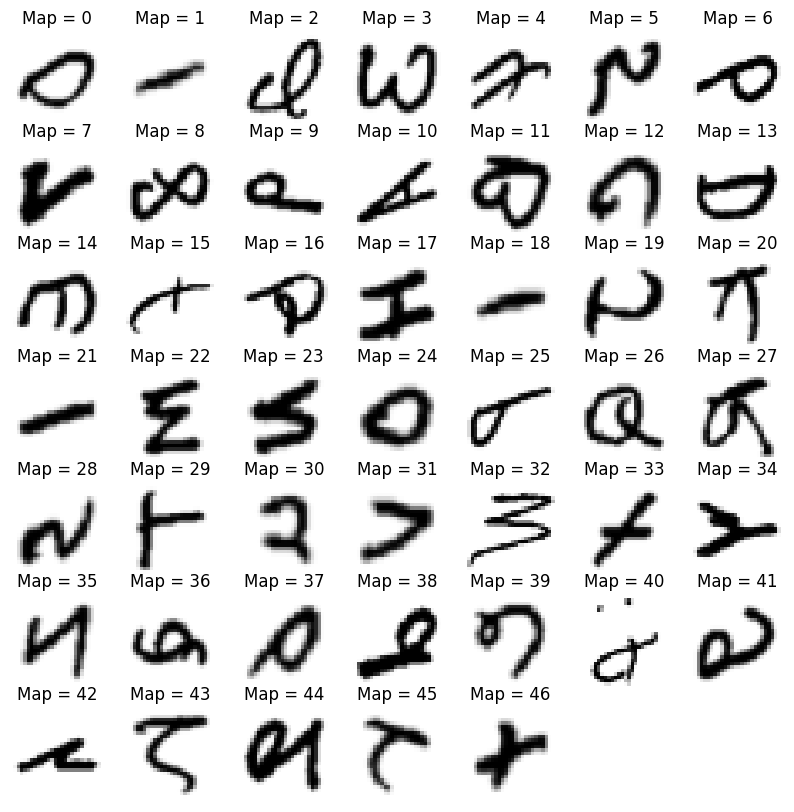

In [57]:
#3. Viewing the letters

#picking an example from each class
examples = {};

for letters in range(47):
    for index,row in dataSetTrain.iterrows():
        if letters == row['45']:
            vetorImg = np.zeros((1,784));
            j = 0;
            for pixel in row.keys()[1:]:
                vetorImg[0,j] = row[pixel];
                j+=1;
            matrizImg = vetorImg.reshape((28,28));
            break;
    examples[letters] = matrizImg;

#generating an image from each example
plt.figure(figsize=[10,10]);
for letter in range(47):
    plt.subplot(7,7, letter+1);
    plt.axis('off');
    plt.imshow(examples[letter], cmap=plt.cm.gray_r, interpolation='nearest');
    plt.title('Map = %d'%int(letter));
plt.show();

### 3 - Build/Choose the model

We'll use the classifier Support Vector Classifier (SVC) e do a linear separation

In [ ]:
classifier = svm.SVC(kernel="linear");